In [3]:
import numpy as np
from random import randint 
# import pandas as pd
from matplotlib.colors import ListedColormap

In [67]:
def KMeans(data, k = 2, norm = np.linalg.norm, maxIter = 15, tolerance = 0.01):
    
    '''
    KMeans Algorithm
    
    ----------
    Parámetros
    ----------
    
    - data (optional): Data Matrix that will be clusterized.
    - k (optional): Integer Number of Clusters. Default value is 2.
    - norm (optional): Function. Vector Space Norm. Default
        value is euclidean norm (numpy.linalg.norm).
    - maxIter (optional): Integer. Maximum iterations that the
        algorithm will be executed. Default value is 15.
    - tolerance (optional): Float. Default value = 0.1.
        
    ------
    Return
    ------
    ???
    '''
    data = np.array(data)
    centroids = []
    # Inicialice centroids randomly
    for i in range(0, k):
        centroids.append(data[i + 4])
    
    isOptimal = False;
    iterations = 0;
    
    while (not isOptimal and iterations < maxIter):
        
        # Inicialize k  empty clusters
        clusters = []
        for i in range(0, k):
            clusters.append([])
        
        iterations += 1
            
        # Classify each individual in the cluster which minimices distance to its centroid.
        for x in data:
            distances = [norm(x - i) for i in centroids]
            minCluster = distances.index(min(distances))
            clusters[minCluster].append(x)

        auxCentroids = list(centroids)

        #New centroids are the mean of each cluster
        for i in range (0, len(centroids)):
            centroids[i] = np.average(clusters[i])


        if max([norm(centroids[i] - auxCentroids[i])/norm(auxCentroids[i]) for i in range (0, len(centroids))]) <= tolerance:
            isOptimal = True

                #If at least a centroid change substantially, then we keep iterating

    return [np.array(i) for i in clusters], centroids

       

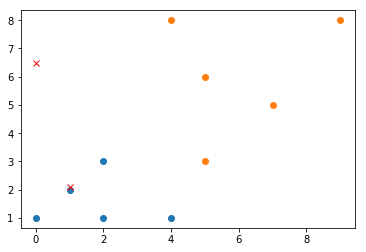

In [68]:
data = np.array(np.mat('2 3;4 1;5 3;2 1;9 8;0 1;1 2;5 6;7 5;4 8'))
cluster, centroids = KMeans(data,2)
clusterPlot(c,0,1, centroids)

In [61]:
import matplotlib.pyplot as pl

def clusterPlot(clusters, x, y, centroids):
    for c in clusters:
        pl.plot(c[:,x], c[:,y], 'o')
    pl.plot(centroids, 'rx')
    pl.show()

[array([[1, 1],
       [1, 2]]), array([[1, 3],
       [1, 4],
       [1, 5]])]


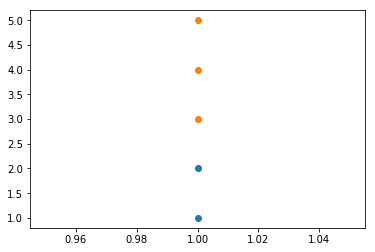

In [8]:
d = [[[1,1],[1,2]],[[1,3],[1,4],[1,5]]]
d = [np.array(i) for i in d]
print(d)
clusterPlot(d,0,1)

In [28]:
centroids = np.array([[1,1],[1,2]])
auxCentroids = np.array([[1,3],[1,9]])
norm = np.linalg.norm

max([norm(centroids[i] - auxCentroids[i])/norm(auxCentroids[i]) for i in range (0, len(centroids))])

0.77302068252392575